In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [32]:
data=pd.read_csv("train.csv")   
titanic_data = pd.read_csv('test.csv')

In [33]:
#删除无关信息,补充缺失信息
data.drop(['Name','PassengerId','Ticket','Cabin'],axis=1,inplace=True)
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Fare']=data['Fare'].fillna(data['Fare'].mean())
data['Embarked']=data['Embarked'].fillna(data['Embarked'].value_counts().index[0])

titanic_data.drop(['Name','PassengerId','Ticket','Cabin'],axis=1,inplace=True)
titanic_data['Age']=titanic_data['Age'].fillna(titanic_data['Age'].mean())
titanic_data['Fare']=titanic_data['Fare'].fillna(titanic_data['Fare'].mean())
titanic_data['Embarked']=titanic_data['Embarked'].fillna(titanic_data['Embarked'].value_counts().index[0])
 
#将性别与登船港口进行数据转换
data.loc[data["Sex"] == "male", "Sex"] = 0
data.loc[data["Sex"] == "female", "Sex"] = 1

titanic_data.loc[titanic_data["Sex"] == "male", "Sex"] = 0
titanic_data.loc[titanic_data["Sex"] == "female", "Sex"] = 1

data["Embarked"] = data["Embarked"].fillna('S')
data.loc[data["Embarked"] == "S", "Embarked"] = 0
data.loc[data["Embarked"] == "C", "Embarked"] = 1
data.loc[data["Embarked"] == "Q", "Embarked"] = 2

titanic_data["Embarked"] = titanic_data["Embarked"].fillna('S')
titanic_data.loc[titanic_data["Embarked"] == "S", "Embarked"] = 0
titanic_data.loc[titanic_data["Embarked"] == "C", "Embarked"] = 1
titanic_data.loc[titanic_data["Embarked"] == "Q", "Embarked"] = 2

#数据缩放
data['Age']=(data['Age']-data['Age'].min()) / (data['Age'].max()-data['Age'].min())
data['Fare']=(data['Fare']-data['Fare'].min()) / (data['Fare'].max()-data['Fare'].min())

titanic_data['Age']=(titanic_data['Age']-titanic_data['Age'].min()) / (titanic_data['Age'].max()-titanic_data['Age'].min())
titanic_data['Fare']=(titanic_data['Fare']-titanic_data['Fare'].min()) / (titanic_data['Fare'].max()-titanic_data['Fare'].min())

print(data.describe())
print(titanic_data.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642    0.367921    0.523008    0.381594    0.062858
std      0.486592    0.836071    0.163383    1.102743    0.806057    0.096995
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    2.000000    0.271174    0.000000    0.000000    0.015440
50%      0.000000    3.000000    0.367921    0.000000    0.000000    0.028213
75%      1.000000    3.000000    0.434531    1.000000    0.000000    0.060508
max      1.000000    3.000000    1.000000    8.000000    6.000000    1.000000
           Pclass         Age       SibSp       Parch        Fare
count  418.000000  418.000000  418.000000  418.000000  418.000000
mean     2.265550    0.396975    0.447368    0.392344    0.069540
std      0.841838    0.166617    0.896760    0.981429    0.108993
min      1.000000    0.000000    0

In [34]:
#划分训练集和测试集，既预留一部分数据(30%),用于评估模型。
from sklearn.model_selection import train_test_split
X=data.drop('Survived',axis=1)
y=data.Survived
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [35]:
# 初始化随机森林模型
# 这里可以通过调整n_estimators参数来改变弱分类器的数量
# 更多的参数可以根据需要进行调整，比如max_depth, min_samples_split等
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=42)

In [36]:
# 预测测试集
y_pred = rf_model.predict(X_test)
# 预测test集
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_data[features]
pred=rf_model.predict(X)
print(pred)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0]


初始模型精度: 0.7798507462686567
模型精度（n_estimators=10）: 0.7798507462686567
模型精度（n_estimators=20）: 0.7649253731343284
模型精度（n_estimators=30）: 0.7798507462686567
模型精度（n_estimators=40）: 0.7723880597014925
模型精度（n_estimators=50）: 0.7761194029850746


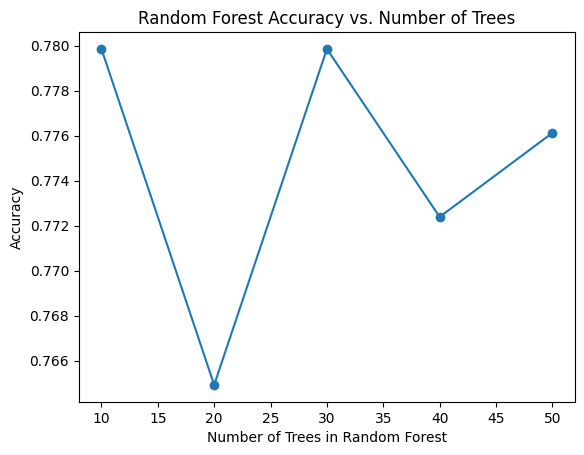

In [37]:
# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f'初始模型精度: {accuracy}')

# 评估随着弱分类器数量增加的影响
n_estimators_range = [10, 20, 30, 40, 50]  # 可以根据需求调整范围
accuracy_scores = []

for n_estimators in n_estimators_range:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'模型精度（n_estimators={n_estimators}）: {accuracy}')

# 可视化随着弱分类器数量增加的精度变化
plt.plot(n_estimators_range, accuracy_scores, marker='o')
plt.xlabel('Number of Trees in Random Forest')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.show()